In [16]:
import numpy as np
import matplotlib.pyplot as plt
import MyFunctions as MF

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Simulation 10</span>
### <span style="color:orange">  MPI library for Metropolis algorithm</span>


Here I implemented a Metropolis algorithm with uniform transition proababilities to evalueate the radius of the hydrogen atom in the ground state and in the first excited state.
First of all let's see what's the main architecture of the code is:
- the code is implemented over 1000000 steps, and performs two parallel Metropolis searches on two nodes.
- every 100 MC steps the nodes echange the their last selected point.
First let's see if the algorithm is correctly using the MPI (mpi4py) library.

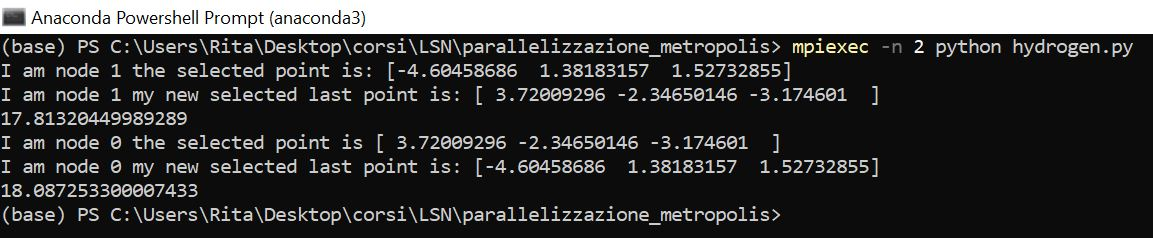

In [14]:
from IPython import display
display.Image('code_snippet.jpg')

As we can see the code is able to exchange correctly the $x,y,z$ coordinates between the node 0 and 1

Now let's analyze the elapsed time for computing the radius in the GS:
- without using the mpi4py library the elapsed time is: 6,12 s
- using one node: 5.82 s
- using two nodes and implementing the exchange takes up 8.42 s per node.

So, by implementing the code in this way there seems to be no advantage in terms of time consumption in using two nodes
with respect to not implementing any kind of parallelization.

This are the results in terms of the calculation of the radius, a comparison between the three instances.

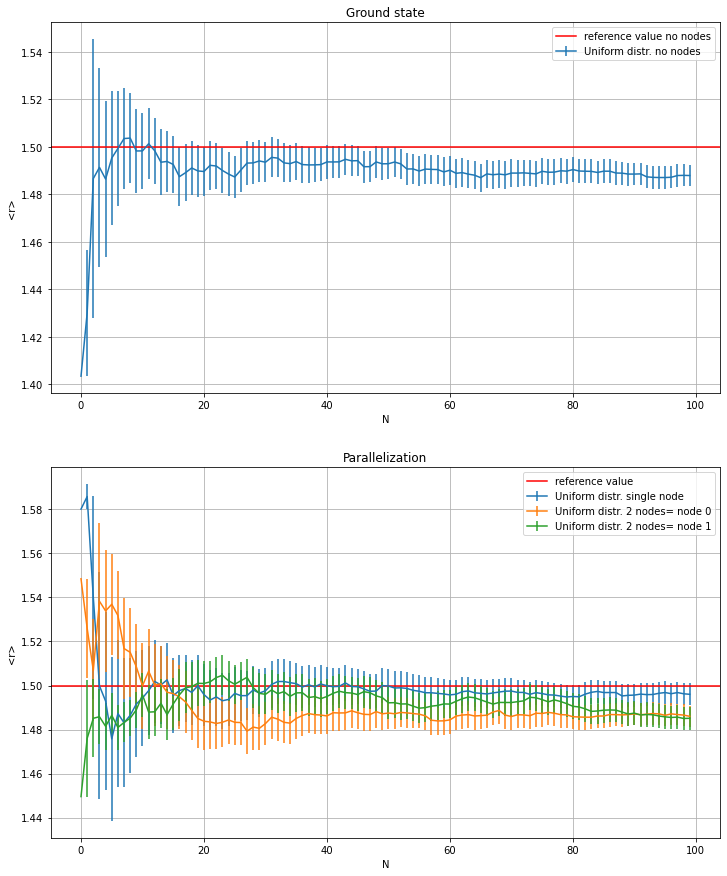

In [15]:
rad_firstUniform= np.load('radGSuniformNN.npy')
error_radfirstUniform = np.load('ErrorGSuniformNN.npy')
n= len(rad_firstUniform)



#rad_secondUniform= np.load('radFirstuniform.npy')
#error_radsecondUniform = np.load('ErrorFirstuniform.npy')
#m= len(rad_secondUniform)
#rad_secondGauss= np.load('radFirstgauss.npy')
#error_radsecondGauss = np.load('ErrorFirstgauss.npy')


figure, (ax1, ax2) = plt.subplots(nrows= 2, ncols=1, figsize=(12, 15))

ax1.set_title('Ground state')
ax1.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr. no nodes')
ax1.axhline(y=1.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value no nodes')
ax1.set_xlabel('N')
ax1.set_ylabel('<r>')
ax1.legend()
ax1.grid('True')



n= len(rad_firstUniform)
ax2.set_title('Parallelization')
rad_firstUniform= np.load('radGSuniformSN.npy')
error_radfirstUniform = np.load('ErrorGSuniformSN.npy')
ax2.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr. single node')
ax2.axhline(y=1.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value')
rad_firstUniform= np.load('radGSuniformN0.npy')
error_radfirstUniform = np.load('ErrorGSuniformN0.npy')
ax2.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr. 2 nodes= node 0')
rad_firstUniform= np.load('radGSuniformN1.npy')
error_radfirstUniform = np.load('ErrorGSuniformN1.npy')
ax2.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr. 2 nodes= node 1')
ax2.set_xlabel('N')
ax2.set_ylabel('<r>')
ax2.legend()
ax2.grid('True')

The result obtained after the parallelization are completely equivalent, but there is no advantge in parallelize the code in this way.

### Alternative implementation:

You could use 2 nodes that communicate every 100 iterations of the metropolis algorithm and run the algorithm for half of the M steps, so 500000. Then use both samplig of the radius to extimate the value of the radius in the ground state. The code takes up 9.19 s for each node), and then merging togheter the results of the sampling As you can see, from the plot below, the result obatained suggest that the approach gives a result that is compareble with the previous one, but using "half" of the iteraitions of the code. Honestly, though, I do not see an advantage in terms of elapsed time for this approach. Probably an approache that would diminish the elapsed time is to rewrite the code using only the numpy library and exploiting numba or a complete vectorization of the code.

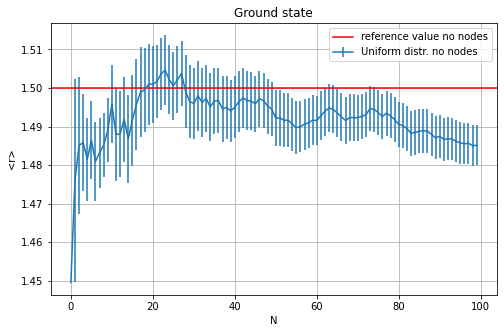

In [21]:
v1 = np.load('Radius1.npy')
v0 = np.load('Radius0.npy')
radius = np.ravel([v0,v1],'F')
L=int(len(radius)/100)
M1,M2 =MF.SimpleMean(radius,100,L)
# raggio sf uniform
MeanRad, ErrorRad= MF.BlockMean(M1,M2,100)
figure = plt.subplots(figsize =(8, 5))

plt.title('Ground state')
plt.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr. no nodes')
plt.axhline(y=1.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value no nodes')
plt.xlabel('N')
plt.ylabel('<r>')
plt.legend()
plt.grid('True')



### TSP and mpi4py library

Apparently there seems to be some kind of limitation for what concerns the use of the mpi4py library in more completx problems such as the TSP problem:
- there seems to be some limitations in the process of exchanging messages among nodes.
- a code as the one below, which as more or less the same architecture of the implemetation of the metropolis algorithm, the only way to exchange bigger vector or matrices is to use the function **numpy.ascontiguousarray.()**


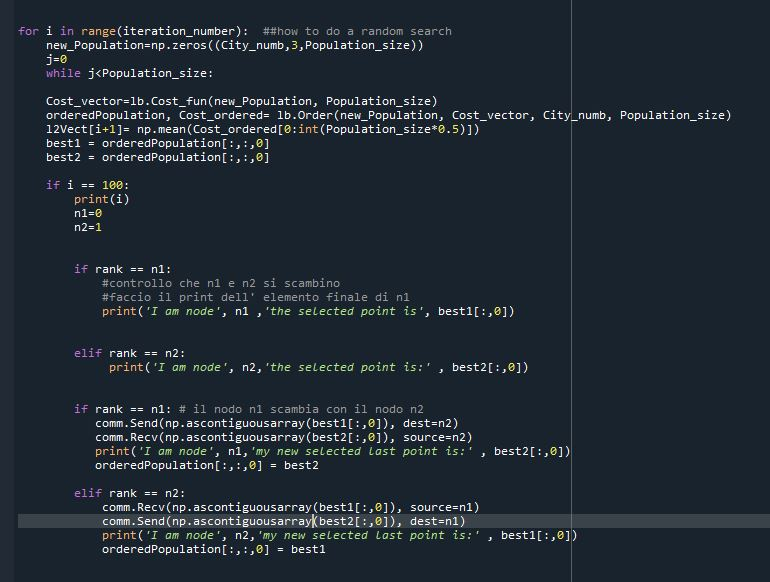

In [23]:
display.Image('code_snippet2.jpg')

As you can see someething is clearly not working correctly.

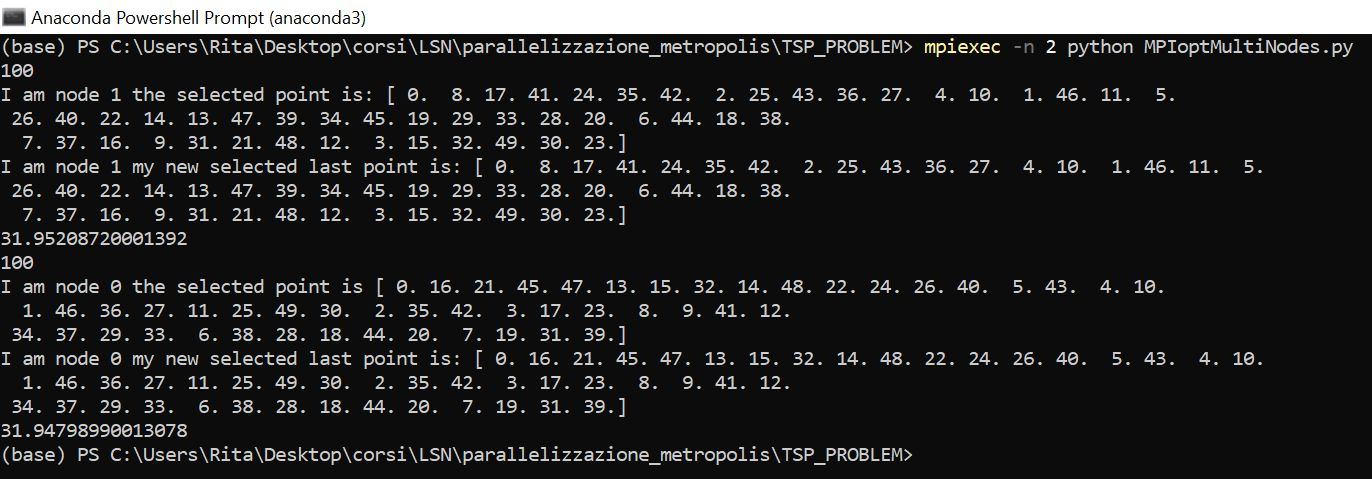

In [25]:
display.Image('code_snippet3.jpg')